In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
rng = np.random.default_rng(237800129231587500768862935996202802056)

In [3]:
sigma_I = 0.1

def current_measurement(r, R, V):
    Itrue = V / (R + r)
    Iobs = rng.normal(loc=Itrue, scale=sigma_I)
    return Iobs

In [4]:
V_true = rng.uniform(low=1, high=2)
R_true = rng.uniform(low=1, high=2)

rs = linspace(0.1, 10, 100)
Iobs = [current_measurement(r, R_true, V_true) for r in rs]

Text(0, 0.5, '$I(r)$ ($\\mathrm{A}$)')

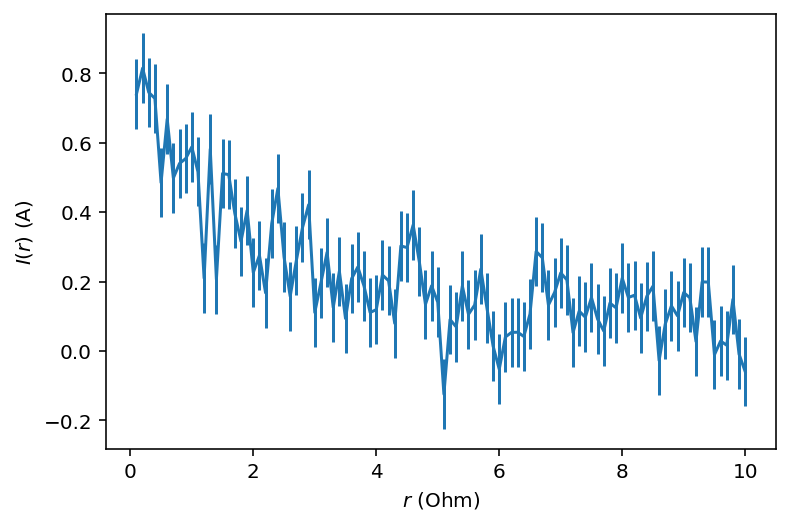

In [5]:
errorbar(rs, Iobs, yerr=sigma_I)
xlabel(r'$r$ ($\mathrm{Ohm}$)')
ylabel(r'$I(r)$ ($\mathrm{A}$)')

In [6]:
print('r\tIobs')
for r, I in zip(rs, Iobs):
    print('{:.3f}\t{:.3f}'.format(r, I))

r	Iobs
0.100	0.740
0.200	0.815
0.300	0.745
0.400	0.728
0.500	0.485
0.600	0.669
0.700	0.498
0.800	0.540
0.900	0.554
1.000	0.588
1.100	0.517
1.200	0.210
1.300	0.582
1.400	0.206
1.500	0.511
1.600	0.508
1.700	0.396
1.800	0.316
1.900	0.405
2.000	0.226
2.100	0.276
2.200	0.168
2.300	0.367
2.400	0.469
2.500	0.271
2.600	0.158
2.700	0.260
2.800	0.355
2.900	0.421
3.000	0.111
3.100	0.197
3.200	0.285
3.300	0.126
3.400	0.230
3.500	0.094
3.600	0.209
3.700	0.242
3.800	0.188
3.900	0.111
4.000	0.119
4.100	0.219
4.200	0.203
4.300	0.080
4.400	0.303
4.500	0.298
4.600	0.363
4.700	0.258
4.800	0.134
4.900	0.188
5.000	0.141
5.100	-0.124
5.200	0.091
5.300	0.070
5.400	0.187
5.500	0.106
5.600	0.132
5.700	0.236
5.800	0.124
5.900	0.014
6.000	-0.052
6.100	0.040
6.200	0.054
6.300	0.054
6.400	0.042
6.500	0.107
6.600	0.287
6.700	0.269
6.800	0.132
6.900	0.169
7.000	0.225
7.100	0.205
7.200	0.053
7.300	0.115
7.400	0.098
7.500	0.154
7.600	0.092
7.700	0.058
7.800	0.138
7.900	0.124
8.000	0.210
8.100	0.154
8.200	0.161
8.300	0

$$
x \mapsto r \\
f(x) \mapsto I_\mathrm{obs} \\
I_\mathrm{obs}\left( r, V_\mathrm{true}, R_\mathrm{true} \right)
$$

In [21]:
# proposal function q(x'|x) where x is a 2-component vector
def q(x):
    # draw from a multivariate gaussian with mean [0,0] and covariance matrix I
    # Add the randomly drawn number to x and return the sum
    mu = np.array([0.0, 0.0])
    sigma = np.matrix([ [0.5,0.0], [0.0,0.5] ])    # covariance matrix
    q = stats.multivariate_normal.rvs(mean=mu, cov=sigma)
    return x + q

Part (a)

In [22]:
# density function f(x) maps to Iobs(r)
# takes a vector x = (x1, x2) as input
def make_log_likelihood(rs):
    
    def log_likelihood(V, R):
                
        # initialize the log likelihood function
        ln_likelihood = 0.0

        # loop for all values of x in the x-array
        for i in range(len(rs)):
            
            # initialize r_i, V_i, R_i for each iteration
            r_i = rs[i]
            Iobs_i = Iobs[i]
            V_i = V
            R_i = R
            sigma_I = 0.1
            
            # calculate true value of I
            Itrue_i = V_i / (R_i + r_i)

            # calculate each term
            term = np.log(1.0 / (sigma_I*np.sqrt(2.0*np.pi))) \
            - 0.5 * (Iobs_i-Itrue_i) * (Iobs_i-Itrue_i) / (sigma_I*sigma_I)

            # increment log-likelihood
            ln_likelihood += term

            # print statement to debug code
            #print("x: " + str(xi) + " | sigma: " + str(sigma_i) + " | Term being added: " + str(term))
            
        return ln_likelihood
        
    return log_likelihood

Run MCMC

In [23]:
# Create the lnf function
lnf = make_log_likelihood(rs)

# Markov chain
VRs = [[0.0,0.0]]    # array of V, R ordered pairs 
                     # for the given little r

for i in range(10000):
    
    # Take the last entry in the Markov chain
    VR = VRs[-1]
    V = VR[0]
    R = VR[1]
    
    # propose a new ordered pair of V, R
    VR_new = q(VR)
    V_new = VR_new[0]
    R_new = VR_new[1]
    
    # accept if acceptance ratio is greater than 
    # a randomly generated value from 0 to 1
    accept_diff = lnf(V_new, R_new) - lnf(V, R)
    if math.log(rand()) < accept_diff:
        VRs.append(VR_new)
    else:
        VRs.append(VR)

In [24]:
#plot(xs)

In [25]:
# Extract V- and R-coordinates from the array of vectors
Vs = []    # list of V values
Rs = []    # list of R values

for i in VRs:
    Vs.append(i[0])
    Rs.append(i[1])
    
# Variation of the loop: use an if statement to omit burn-in points
#for i in VRs:
    #

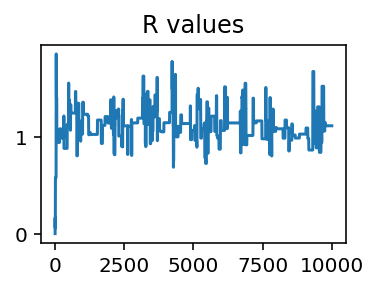

In [26]:
# Trace the evolution of V and R values over iterations
subplot(211)
title('V values')
plot(Vs)

subplot(222)
title('R values')
plot(Rs)

show()

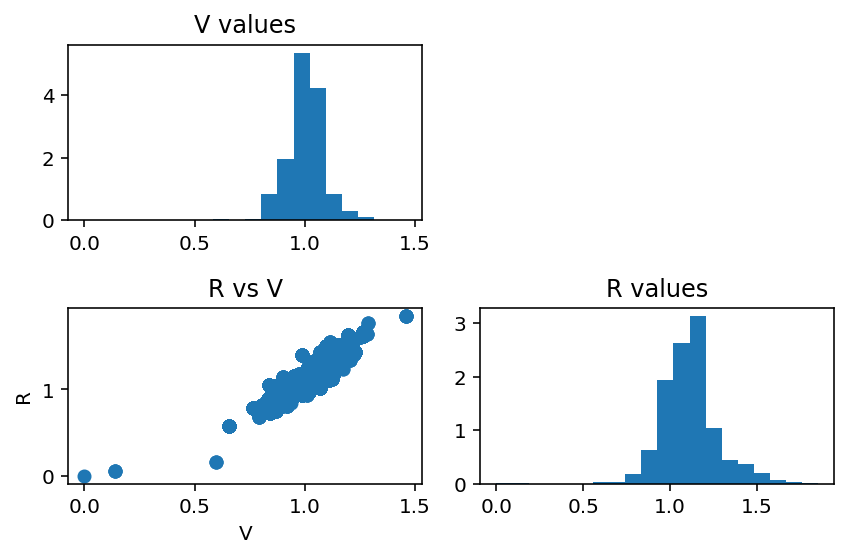

In [27]:
    
# Generate 1-dimensional histograms of V- and R-coordinates and 2-dimensional scatterplot
subplot(221)
title('V values')
hist(Vs, density=True, bins=20)

subplot(224)
title('R values')
hist(Rs, density=True, bins=20)

subplot(223)
title('R vs V')
scatter(Vs, Rs)
plt.xlabel('V')
plt.ylabel('R')

tight_layout()

show()